In [327]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [328]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

In [329]:
%autoreload
from pipeline import Pipeline, BuilingIdsEnum
from utils import plot_energy_usage, ColumnParam
pipe = Pipeline()

In [330]:
main_df = pipe.get_data(BuilingIdsEnum.MAIN)
print("columns:", list(main_df.columns))
# ['timestamp', 'value_import', 'property_id', 'building', 'area', 'value_export', 'solar_consumption', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation']

columns: ['timestamp', 'value_import', 'value_export', 'solar_consumption', 'net_consumption', 'net_consumption_per_sqm', 'predicted_consumption', 'building', 'property_id', 'area', 'temperature', 'wind_speed', 'wind_direction', 'cloud_fraction', 'precipitation', 'spot_price_nok']


In [331]:
main_df

,timestamp,value_import,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok
0,2023-07-01 00:00:00,27.5,0.0,0.000000,27.500000,0.022936,33.090803,main building,10724,1199,13.6,1.6,251.5,0.5,0.0,1.137242
1,2023-07-01 01:00:00,27.1,0.0,0.000000,27.100000,0.022602,35.807308,main building,10724,1199,13.2,2.0,246.5,0.4,0.0,1.075944
2,2023-07-01 02:00:00,26.8,0.0,0.000000,26.800000,0.022352,31.249129,main building,10724,1199,12.3,1.6,260.4,0.3,0.0,0.970594
3,2023-07-01 03:00:00,25.9,0.0,0.000000,25.900000,0.021601,31.543543,main building,10724,1199,11.9,0.6,285.0,0.9,0.0,0.908986
4,2023-07-01 04:00:00,26.4,0.0,0.000000,26.400000,0.022018,31.662718,main building,10724,1199,11.9,0.2,295.8,0.8,0.0,0.765118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2024-09-03 18:00:00,37.4,0.0,0.184148,37.584148,0.031346,46.793229,main building,10724,1199,17.8,2.5,140.8,1.0,1.4,0.662337
10339,2024-09-03 19:00:00,29.2,0.0,0.157455,29.357455,0.024485,43.928094,main building,10724,1199,17.8,1.8,112.6,1.0,2.5,0.664547
10340,2024-09-03 20:00:00,28.9,0.0,0.017115,28.917115,0.024118,44.909907,main building,10724,1199,17.7,1.1,75.1,1.0,2.6,0.663151
10341,2024-09-03 21:00:00,35.0,0.0,0.018016,35.018016,0.029206,47.204702,main building,10724,1199,18.0,3.4,111.0,1.0,2.9,0.662221


In [332]:
#Finding the cost for each hour
main_df['Cost_Net_Of_Sun']=(main_df['value_import']-main_df['value_export'])*main_df['spot_price_nok']
main_df['Cost_Gross']=(main_df['value_import']+main_df['solar_consumption'])*main_df['spot_price_nok']
main_df['Gross_Consumption']=main_df['value_import']+main_df['solar_consumption']
main_df['Pred_Cost']=main_df['predicted_consumption']*main_df['spot_price_nok']

main_df

,timestamp,value_import,value_export,solar_consumption,net_consumption,net_consumption_per_sqm,predicted_consumption,building,property_id,area,temperature,wind_speed,wind_direction,cloud_fraction,precipitation,spot_price_nok,Cost_Net_Of_Sun,Cost_Gross,Gross_Consumption,Pred_Cost
0,2023-07-01 00:00:00,27.5,0.0,0.000000,27.500000,0.022936,33.090803,main building,10724,1199,13.6,1.6,251.5,0.5,0.0,1.137242,31.274152,31.274152,27.500000,37.632247
1,2023-07-01 01:00:00,27.1,0.0,0.000000,27.100000,0.022602,35.807308,main building,10724,1199,13.2,2.0,246.5,0.4,0.0,1.075944,29.158077,29.158077,27.100000,38.526651
2,2023-07-01 02:00:00,26.8,0.0,0.000000,26.800000,0.022352,31.249129,main building,10724,1199,12.3,1.6,260.4,0.3,0.0,0.970594,26.011911,26.011911,26.800000,30.330208
3,2023-07-01 03:00:00,25.9,0.0,0.000000,25.900000,0.021601,31.543543,main building,10724,1199,11.9,0.6,285.0,0.9,0.0,0.908986,23.542733,23.542733,25.900000,28.672633
4,2023-07-01 04:00:00,26.4,0.0,0.000000,26.400000,0.022018,31.662718,main building,10724,1199,11.9,0.2,295.8,0.8,0.0,0.765118,20.199109,20.199109,26.400000,24.225709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2024-09-03 18:00:00,37.4,0.0,0.184148,37.584148,0.031346,46.793229,main building,10724,1199,17.8,2.5,140.8,1.0,1.4,0.662337,24.771409,24.893377,37.584148,30.992893
10339,2024-09-03 19:00:00,29.2,0.0,0.157455,29.357455,0.024485,43.928094,main building,10724,1199,17.8,1.8,112.6,1.0,2.5,0.664547,19.404758,19.509394,29.357455,29.192261
10340,2024-09-03 20:00:00,28.9,0.0,0.017115,28.917115,0.024118,44.909907,main building,10724,1199,17.7,1.1,75.1,1.0,2.6,0.663151,19.165067,19.176416,28.917115,29.782054
10341,2024-09-03 21:00:00,35.0,0.0,0.018016,35.018016,0.029206,47.204702,main building,10724,1199,18.0,3.4,111.0,1.0,2.9,0.662221,23.177731,23.189661,35.018016,31.259939


In [333]:
merged_df, cols =pipe.select_and_merge_datasets(["value_import"], periode="m")
merged_df = merged_df.iloc[1:-1]
    
plot_energy_usage(merged_df, cols,
                    titel="monthly Energy Usage Comparison",
                    yaxis_title="Energy [kWh]",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [334]:
daily_main=main_df.groupby(main_df['timestamp'].dt.date)[['Cost_Net_Of_Sun','Cost_Gross','Pred_Cost']].sum().reset_index()

sumsol=daily_main['Cost_Net_Of_Sun'].sum()
sumuten=daily_main['Cost_Gross'].sum()
print(sumsol)
print(sumuten)

plot_cols =[
    ColumnParam("Cost_Net_Of_Sun", "Cost: Net of Sun"),
    ColumnParam("Cost_Gross", "Total Cost"),
]


plot_energy_usage(daily_main, plot_cols,
                    titel="Daily Energy Cost Comparison",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

226585.2546681037
265795.57054763567


In [335]:
a_df = pipe.get_data(BuilingIdsEnum.A)
b_df = pipe.get_data(BuilingIdsEnum.B)
c_df = pipe.get_data(BuilingIdsEnum.C)

#Finner kostnader til A, B og C
a_df['Cost A']=a_df['net_consumption']*a_df['spot_price_nok']
b_df['Cost B']=b_df['net_consumption']*b_df['spot_price_nok']
c_df['Cost C']=c_df['net_consumption']*c_df['spot_price_nok']

#Filtrerer for en cleanere merge
filter_main=main_df[['timestamp', 'Cost_Net_Of_Sun','Pred_Cost', 'Cost_Gross']]
filter_a=a_df[['timestamp', 'Cost A']]
filter_b=b_df[['timestamp', 'Cost B']]
filter_c=c_df[['timestamp', 'Cost C']]


merged_df = pd.merge(filter_main, filter_a, on='timestamp', how='inner').merge(filter_b, on='timestamp').merge(filter_c, on='timestamp')

daily_all=merged_df.groupby(merged_df['timestamp'].dt.date)[['Cost_Net_Of_Sun', 'Cost A', 'Cost B', 'Cost C', 'Pred_Cost', 'Cost_Gross']].sum().reset_index()



1. Daily Cost

In [336]:
plot_cols_all =[
    ColumnParam("Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Cost A", "Cost Building A"),
    ColumnParam("Cost B", "Cost Building B"),
    ColumnParam("Cost C", "Cost Building C"),
]


plot_energy_usage(daily_all, plot_cols_all,
                    titel="Daily Cost Comparison",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

2. Weekly Cost

In [337]:
merged_df.set_index('timestamp', inplace=True)
weekly_grouped = merged_df.groupby(pd.Grouper(freq='W')).sum().reset_index()

plot_cols_all =[
    ColumnParam("Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Cost A", "Cost Building A"),
    ColumnParam("Cost B", "Cost Building B"),
    ColumnParam("Cost C", "Cost Building C"),
]


plot_energy_usage(weekly_grouped, plot_cols_all,
                    titel="Weekly Cost Comparison",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

3.  Monthly Cost

In [338]:
monthly_grouped = merged_df.groupby(pd.Grouper(freq='ME')).sum().reset_index()
monthly_grouped=monthly_grouped.drop(monthly_grouped.index[-1])
plot_cols_all =[
    ColumnParam("Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Cost A", "Cost Building A"),
    ColumnParam("Cost B", "Cost Building B"),
    ColumnParam("Cost C", "Cost Building C"),
]


plot_energy_usage(monthly_grouped, plot_cols_all,
                    titel="Monthly Cost Comparison Spot Price",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [339]:
#Making function to find the effektledd
def find_effect(df,navn_total):
    nydf=df.copy()
    nydf.set_index('timestamp', inplace=True)
    monthly_max_consumption = nydf[navn_total].resample('ME').max()
    monthly_max_df = monthly_max_consumption.reset_index()
    monthly_max_df.columns = ['timestamp', 'Max Consumption']
    monthly_max_df['Adjusted Consumption'] = np.where(
        monthly_max_df['timestamp'].dt.month.isin([4, 5, 6, 7, 8, 9]),   # Summer months
        monthly_max_df['Max Consumption'] * 44,
        monthly_max_df['Max Consumption'] * 104  # Winter months (remaining)
    )
    return monthly_max_df

monthly_max_main=find_effect(main_df, "value_import")
monthly_max_main.set_index('timestamp', inplace=True)
monthly_max_a=find_effect(a_df, "value_import")
monthly_max_a.set_index('timestamp', inplace=True)
monthly_max_b=find_effect(b_df,'value_import')
monthly_max_b.set_index('timestamp', inplace=True)
monthly_max_c=find_effect(c_df,'value_import')
monthly_max_c.set_index('timestamp', inplace=True)
monthly_max_pred=find_effect(main_df, "predicted_consumption")
monthly_max_pred.set_index('timestamp', inplace=True)
monthly_max_gross=find_effect(main_df, "Gross_Consumption")
monthly_max_gross.set_index('timestamp', inplace=True)




tariff_cost=monthly_grouped.copy()
tariff_cost=tariff_cost*1.05
tariff_cost['Tariff_Cost_Net_Of_Sun']=tariff_cost['Cost_Net_Of_Sun']+monthly_max_main['Adjusted Consumption']
tariff_cost['Tariff_Cost A']=tariff_cost['Cost A']+monthly_max_a['Adjusted Consumption']
tariff_cost['Tariff_Cost B']=tariff_cost['Cost B']+monthly_max_b['Adjusted Consumption']
tariff_cost['Tariff_Cost C']=tariff_cost['Cost C']+monthly_max_c['Adjusted Consumption']
tariff_cost['Prediction']=tariff_cost['Pred_Cost']+monthly_max_pred['Adjusted Consumption']
tariff_cost['Tariff_Gross']=tariff_cost['Cost_Gross']+monthly_max_gross['Adjusted Consumption']

tariff_cost=tariff_cost.reset_index()
tariff_cost

,timestamp,Cost_Net_Of_Sun,Pred_Cost,Cost_Gross,Cost A,Cost B,Cost C,Tariff_Cost_Net_Of_Sun,Tariff_Cost A,Tariff_Cost B,Tariff_Cost C,Prediction,Tariff_Gross
0,2023-07-31,15162.456567,23142.821656,21905.154554,19414.417249,14525.826892,26907.178895,17661.656567,22177.617249,16370.306892,30567.978895,26092.859098,24785.237879
1,2023-08-31,16959.397468,24972.085515,23071.723333,20023.569510,15524.439077,29084.286575,19836.997468,22830.769510,17302.039077,32564.686575,27927.069200,26266.373189
2,2023-09-30,13950.523299,18170.768207,17283.562798,13972.432224,11683.449233,20971.401009,16352.923299,16735.632224,13559.609233,24333.001009,21049.479219,20238.830164
3,2023-10-31,13909.029557,14046.353297,15008.125051,11801.482563,11640.593356,16443.192665,20606.629557,16356.682563,15526.033356,23099.192665,19611.990918,21720.333349
4,2023-11-30,30940.969028,28206.133231,31799.103258,25709.440470,25609.302381,33359.083922,39500.169028,30347.840470,29644.502381,38819.083922,32386.342427,40358.619765
5,2023-12-31,30056.844573,26437.071101,30301.846009,24120.931848,25964.590829,29979.310869,39645.644573,28676.131848,30981.550829,35917.710869,30864.420039,39899.101845
6,2024-01-31,29505.982794,27474.208296,29707.212516,23872.613652,25928.096110,28896.189961,43639.582794,29135.013652,33798.816110,34886.589961,35227.039319,43840.812516
7,2024-02-29,17877.468363,17461.778224,18450.267870,16355.288882,16000.541391,20566.959947,24793.468363,20868.888882,20468.381391,26328.559947,21837.865259,25401.868313
8,2024-03-31,16718.131925,18660.258364,18520.361429,16845.830490,15518.433307,21186.863304,22510.931925,21297.030490,19495.393307,26501.263304,23115.496809,25266.713393
9,2024-04-30,12430.044494,16012.271929,16627.271219,14408.482460,10939.848720,18528.293969,14484.844494,16238.882460,12488.648720,20829.493969,18105.563536,18948.961505


In [340]:
#Finne største besparelse fra peak gjort med solceller
difference=monthly_max_gross-monthly_max_main

difference

,Max Consumption,Adjusted Consumption
timestamp,,
2023-07-31,8.656439,380.883325
2023-08-31,7.205679,317.049857
2023-09-30,12.565167,552.867367
2023-10-31,0.140464,14.608298
2023-11-30,0.003043,0.316507
2023-12-31,0.081306,8.455836
2024-01-31,0.000000,0.000000
2024-02-29,0.342312,35.600443
2024-03-31,9.168769,953.551964


5. Montly Cost with tariff

In [341]:
plot_cols_tar =[
    ColumnParam("Tariff_Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Tariff_Cost A", "Cost Building A"),
    ColumnParam("Tariff_Cost B", "Cost Building B"),
    ColumnParam("Tariff_Cost C", "Cost Building C"),
]


plot_energy_usage(tariff_cost, plot_cols_tar,
                    titel="Monthly Cost Comparison Tariff",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

6. Spot main vs predicted

In [342]:
plot_cols_tar =[
    ColumnParam("Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Pred_Cost", "Predicted Cost Main Building"),
]
main_df.set_index('timestamp',inplace=True)
monthly_mainpred = main_df.groupby(pd.Grouper(freq='ME')).sum().reset_index()


plot_energy_usage(monthly_mainpred, plot_cols_tar,
                    titel="Monthly Cost Comparison",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )


7. Tariff main vs predicted

In [343]:
plot_cols_tarny =[
    ColumnParam("Tariff_Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Prediction", "Cost Predicted Building"),
]

tariff_cost=tariff_cost.reset_index()

plot_energy_usage(tariff_cost, plot_cols_tarny,
                    titel="Monthly Cost Comparison",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

8. Main without sun panels vs with sun panels tariff

In [344]:
plot_cols_tarny =[
    ColumnParam("Tariff_Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Tariff_Gross", "Cost Building Without Sun Panels"),
]

tariff_cost=tariff_cost.reset_index()

plot_energy_usage(tariff_cost, plot_cols_tarny,
                    titel="Monthly Cost Comparison Tariff",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [345]:
sumoppgradert=tariff_cost['Tariff_Cost_Net_Of_Sun'].sum()
sumuten=tariff_cost['Tariff_Gross'].sum()
costtariiffpred=tariff_cost['Prediction'].sum()

print("Cost Tariff")
print("Cost with all upgrades= " +str(sumoppgradert))
print("Cost without all the upgrades= " + str(sumuten))
print("Cost Tariff Prediction= " + str(costtariiffpred))



Cost Tariff
Cost with all upgrades= 309059.6618929456
Cost without all the upgrades= 355450.6382659801
Cost Tariff Prediction= 320195.4884989839


9. Main building with and without sun panels spot

In [346]:
plot_cols_spot =[
    ColumnParam("Cost_Net_Of_Sun", "Cost Main Building"),
    ColumnParam("Cost_Gross", "Cost Building Without Sun Panels"),
]

monthly_grouped=monthly_grouped.reset_index()

plot_energy_usage(monthly_grouped, plot_cols_spot,
                    titel="Monthly Cost Comparison Spot",
                    yaxis_title="NOK",
                    tozeroy=False,
                    dark_mode=True,
                    )

In [347]:

#Numbers for Spot Cost
sumoppgradert=main_df['Cost_Net_Of_Sun'].sum()
sumuten=main_df['Cost_Gross'].sum()
costspotpred=main_df['Pred_Cost'].sum()

#Numbers for total consumption
energypredicted=main_df['predicted_consumption'].sum()
energyimport=main_df['value_import'].sum()
sumtotalconsumption=energyimport+main_df['solar_consumption'].sum()




print("Cost Spot")
print("--------------")
print("Cost with all upgrades= " +str(sumoppgradert))
print("Cost without all the upgrades= " + str(sumuten))
print("Predicted Cost= " + str(costspotpred))
print("--------------")

print()
print("Consumption of Energy")
print("--------------")
print("Consumption with all upgrades= " +str(energyimport))
print("Consumption without all the upgrades= " + str(sumtotalconsumption))
print("Predicted Consumption= " + str(energypredicted))

Cost Spot
--------------
Cost with all upgrades= 226585.2546681037
Cost without all the upgrades= 265795.57054763567
Predicted Cost= 256821.57340614928
--------------

Consumption of Energy
--------------
Consumption with all upgrades= 325321.29
Consumption without all the upgrades= 402892.43177550426
Predicted Consumption= 390057.83282376896


10. Bar charts of consumption and cost

Text(0, 0.5, 'Energy Consumption (kWh)')

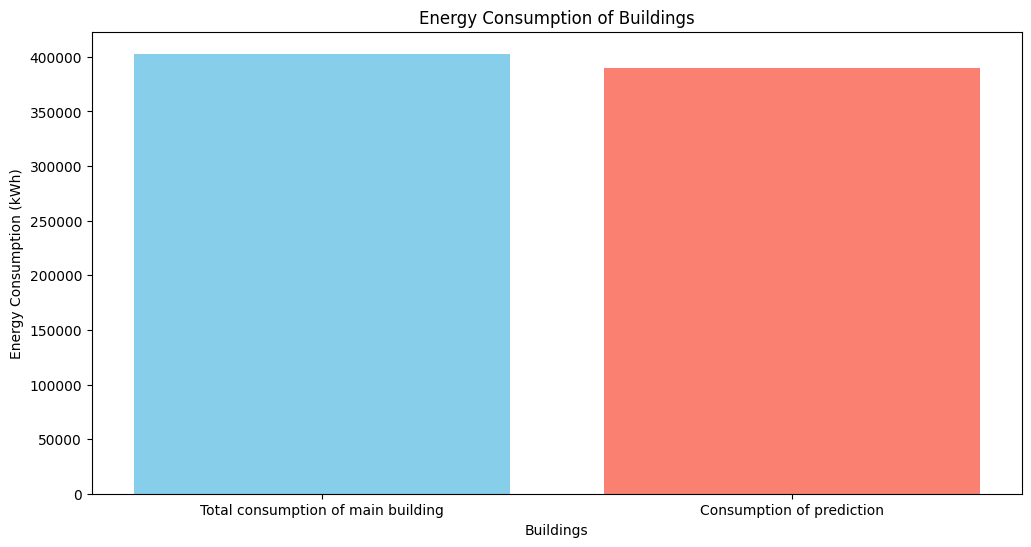

In [348]:
#Lists for making plots
list_consumption=[sumtotalconsumption,energypredicted]
names=["Total consumption of main building", "Consumption of prediction"]

colors = ['skyblue', 'salmon', 'lightgreen']

#Create bar chart
plt.figure(figsize=(12,6))
plt.bar(names, list_consumption, color=colors)

# Add titles and labels
plt.title('Energy Consumption of Buildings')
plt.xlabel('Buildings')
plt.ylabel('Energy Consumption (kWh)')

Text(0, 0.5, 'Energy Consumption (kWh)')

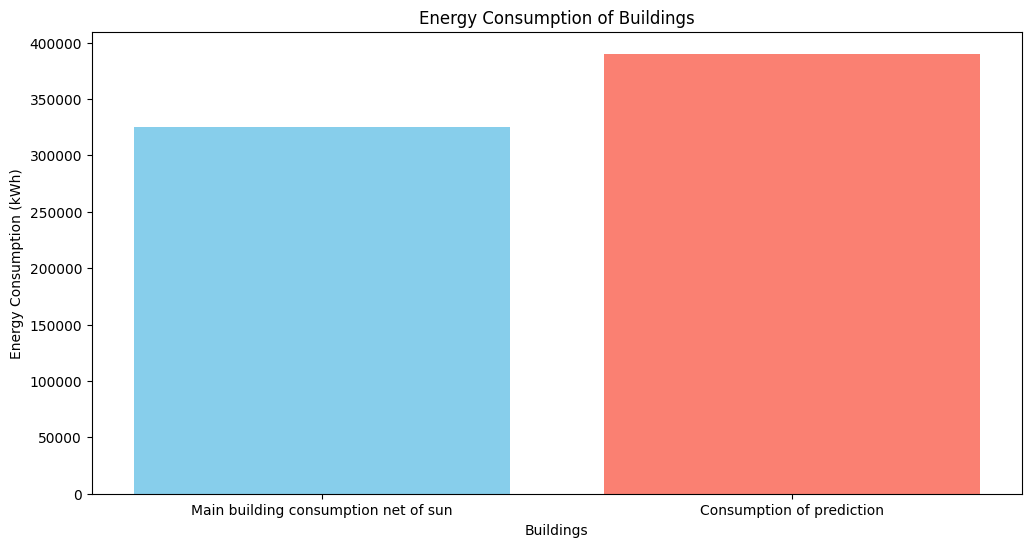

In [349]:
buildings=["Main building consumption net of sun", "Consumption of prediction"]
forbruk=[energyimport,energypredicted]

#Create bar chart
plt.figure(figsize=(12,6))
plt.bar(buildings, forbruk, color=colors)

# Add titles and labels
plt.title('Energy Consumption of Buildings')
plt.xlabel('Buildings')
plt.ylabel('Energy Consumption (kWh)')

Text(0, 0.5, 'Energy Consumption (kWh)')

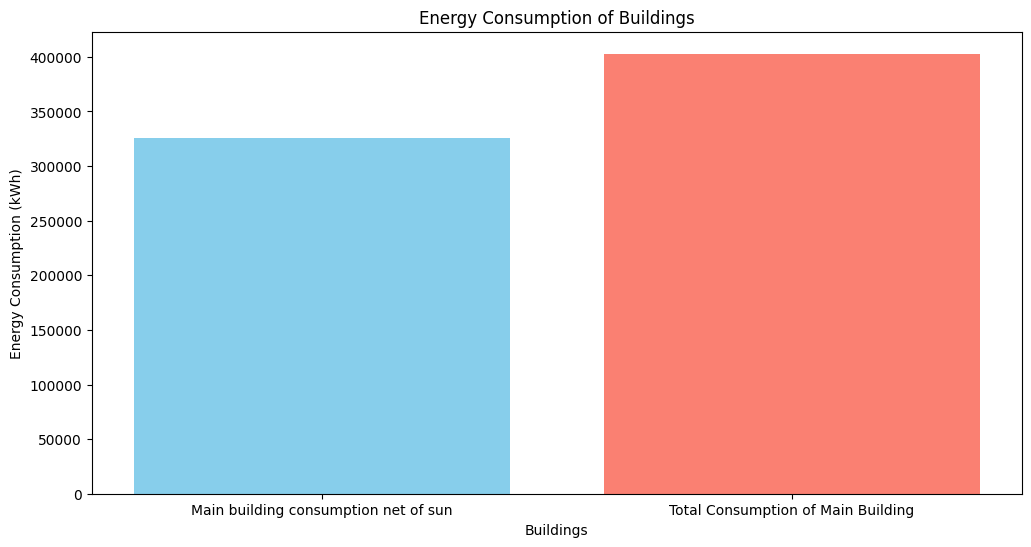

In [350]:
buildings=["Main building consumption net of sun", "Total Consumption of Main Building"]
forbruk=[energyimport,sumtotalconsumption]

#Create bar chart
plt.figure(figsize=(12,6))
plt.bar(buildings, forbruk, color=colors)

# Add titles and labels
plt.title('Energy Consumption of Buildings')
plt.xlabel('Buildings')
plt.ylabel('Energy Consumption (kWh)')